# Problem Statement:
- Use Random Forest to prepare a model on fraud data 
- treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### Data Description :
- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\Random_Forests\Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [4]:
#Check for shape
df.shape

(600, 6)

In [5]:
#check for duplicated
df.duplicated().sum()

0

In [6]:
#Check for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
#Descriptive stats
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
#Check for missing value
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

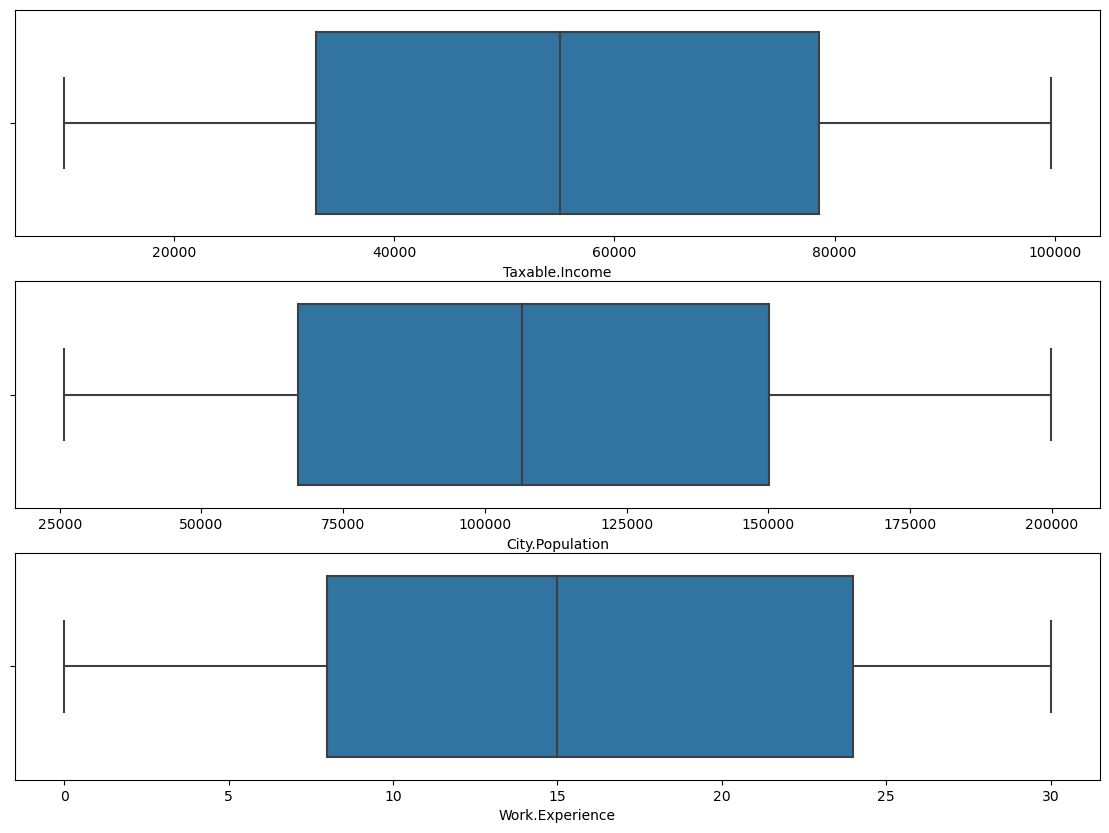

<Figure size 640x480 with 0 Axes>

In [9]:
#Plot a Boxplot to look for outliers
fig, axes=plt.subplots(3,1, figsize=(14,10))
sns.boxplot(x='Taxable.Income', data=df, ax=axes[0])
sns.boxplot(x='City.Population', data=df, ax=axes[1])
sns.boxplot(x='Work.Experience', data=df, ax=axes[2])
plt.show()
plt.tight_layout(pad=2.0)

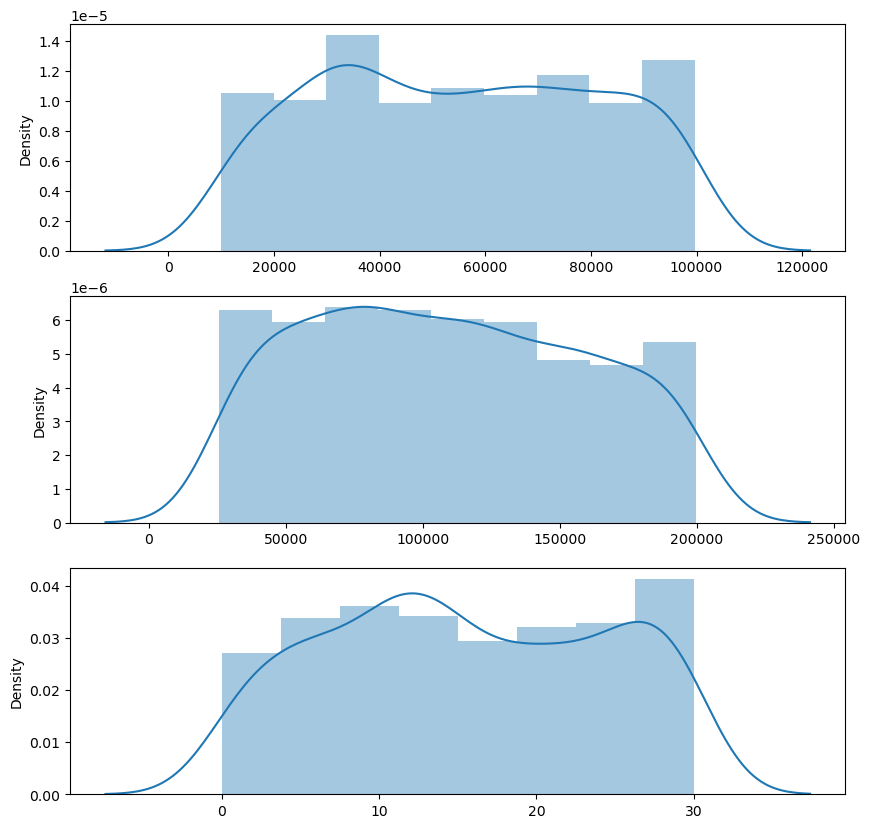

<Figure size 640x480 with 0 Axes>

In [10]:
#Plot a histogram to check for distribution
fig, axes=plt.subplots(3,1, figsize=(10,10))
sns.distplot(x=df['Taxable.Income'], ax=axes[0])
sns.distplot(x=df['City.Population'], ax=axes[1])
sns.distplot(x=df['Work.Experience'], ax=axes[2])
plt.show()
plt.tight_layout(pad=2.0)

In [11]:
#sagrigate the numeric feature
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
df[numerical_features].head()

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28


In [12]:
#sagrigate the catagorical feature
cat_features=[feature for feature in df.columns if df[feature].dtype =='O']
df[cat_features].head()

,Undergrad,Marital.Status,Urban
0,NO,Single,YES
1,YES,Divorced,YES
2,NO,Married,YES
3,YES,Single,YES
4,NO,Married,NO


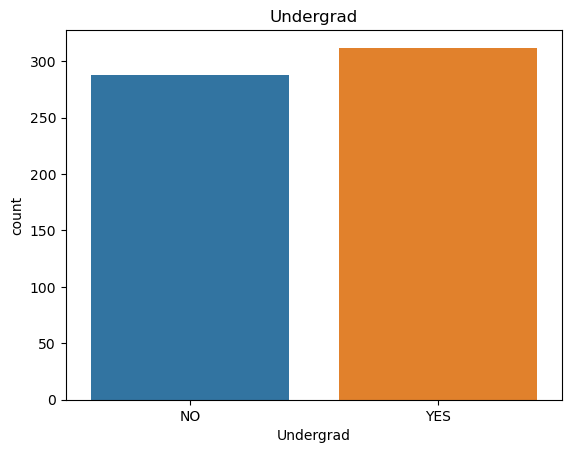

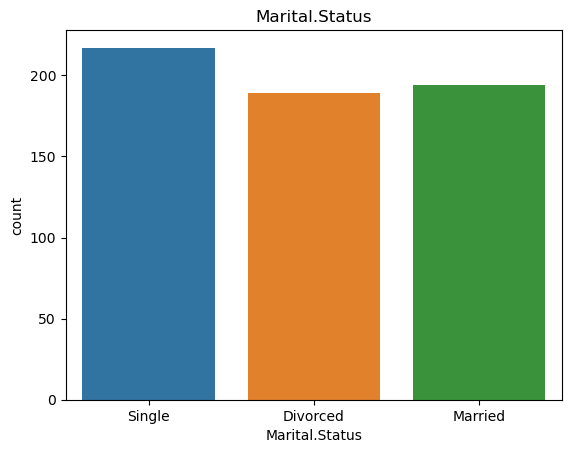

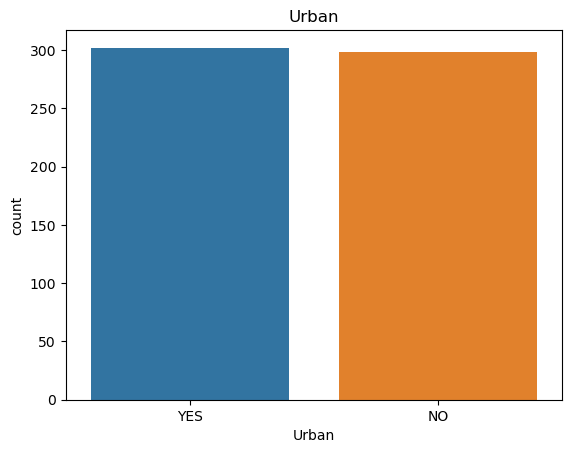

In [13]:
#Check distribution for catagorical feature
for feature in cat_features:
    data=df.copy()
    sns.countplot(x=data[feature])
    plt.title(feature)
    plt.show()

### Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [14]:
df1=df.copy()
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [15]:
#convert target feature in catagorical feature in two catagories as risky and good
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [16]:
df1['Taxable.Income']

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [17]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


# Feature Engineering

In [18]:
def fn(x):
    df1[x]=df1[x].replace('YES',1)
    df1[x]=df1[x].replace('NO',2)

In [19]:
fn('Undergrad')
df1['Undergrad'].value_counts()

1    312
2    288
Name: Undergrad, dtype: int64

In [20]:
def fn(y):
    df1[y]=df1[y].replace('Single',1)
    df1[y]=df1[y].replace('Married',2)
    df1[y]=df1[y].replace('Divorced',3)

In [21]:
fn('Marital.Status')
df1['Marital.Status'].value_counts()

1    217
2    194
3    189
Name: Marital.Status, dtype: int64

In [22]:
def fn(z):
    df1[z]=df1[z].replace('YES',1)
    df1[z]=df1[z].replace('NO',2)

In [23]:
fn('Urban')
df1['Urban'].value_counts()

1    302
2    298
Name: Urban, dtype: int64

In [24]:
#split data in x and y as independent variable and target column
x=df1.drop('Taxable.Income', axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,2,1,50047,10,1
1,1,3,134075,18,1
2,2,2,160205,30,1
3,1,1,193264,15,1
4,2,2,27533,28,2
...,...,...,...,...,...
595,1,3,39492,7,1
596,1,3,55369,2,1
597,2,3,154058,0,1
598,1,2,180083,17,2


In [25]:
y=df1['Taxable.Income']
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['risky' < 'good']

In [26]:
#Label encoding on target column
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
#split the data in train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25, random_state=1)

# Model Building

In [28]:
#Built a model with as built parameter
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [29]:
#Calculate the accuracy
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       119
           1       0.00      0.00      0.00        31

    accuracy                           0.76       150
   macro avg       0.39      0.48      0.43       150
weighted avg       0.62      0.76      0.69       150



In [30]:
#Check for overfitting
print('Training Accuracy:',rfc.score(xtrain,ytrain))
print('Testing Accuracy:',rfc.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 0.76


#### Model is overfitted. As testing accurancy is high and traing accurancy is very low

### Peform K-Fold cross validation on random forest classifier

In [31]:
kf=KFold(n_splits=10)
score=cross_val_score(rfc,x,y,cv=kf)
score

array([0.75      , 0.76666667, 0.68333333, 0.68333333, 0.73333333,
       0.65      , 0.83333333, 0.7       , 0.75      , 0.83333333])

In [32]:
score.mean()

0.7383333333333333

# Hyperparameter Tuning

In [33]:
params={
    'criterion': ['entropy','gini'],
    'max_depth':[2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8],
    'max_features':["auto", "sqrt", "log2"]
}

In [34]:
grid=GridSearchCV(estimator=RandomForestClassifier(), param_grid=params,verbose=2)

In [35]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 2058 candidates, totalling 10290 fits
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=8; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.3s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.4s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.5s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=7; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=6,

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=7,

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.3s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=8,

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.4s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=6; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6; total time=   0.3s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.3s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3; total time=   0.3s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3; total time=   0.3s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=6; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=6; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=5; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=6; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=6; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.3s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=6; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_sam

[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_sam

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=6, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_sam

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.2s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=8, min_samples_split=8; total time=   0.2s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
             verbose=2)

In [36]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

# Final Model Building

In [37]:
model=RandomForestClassifier(criterion='entropy',max_depth=2,max_features='auto',min_samples_split=2,min_samples_leaf=2)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150



In [39]:
print('Training Accuracy:',model.score(xtrain,ytrain))
print('Testing Accuracy:',model.score(xtest,ytest))

Training Accuracy: 0.7933333333333333
Testing Accuracy: 0.7933333333333333


As we can see the now model is Grenerised. 

### Visualize the model

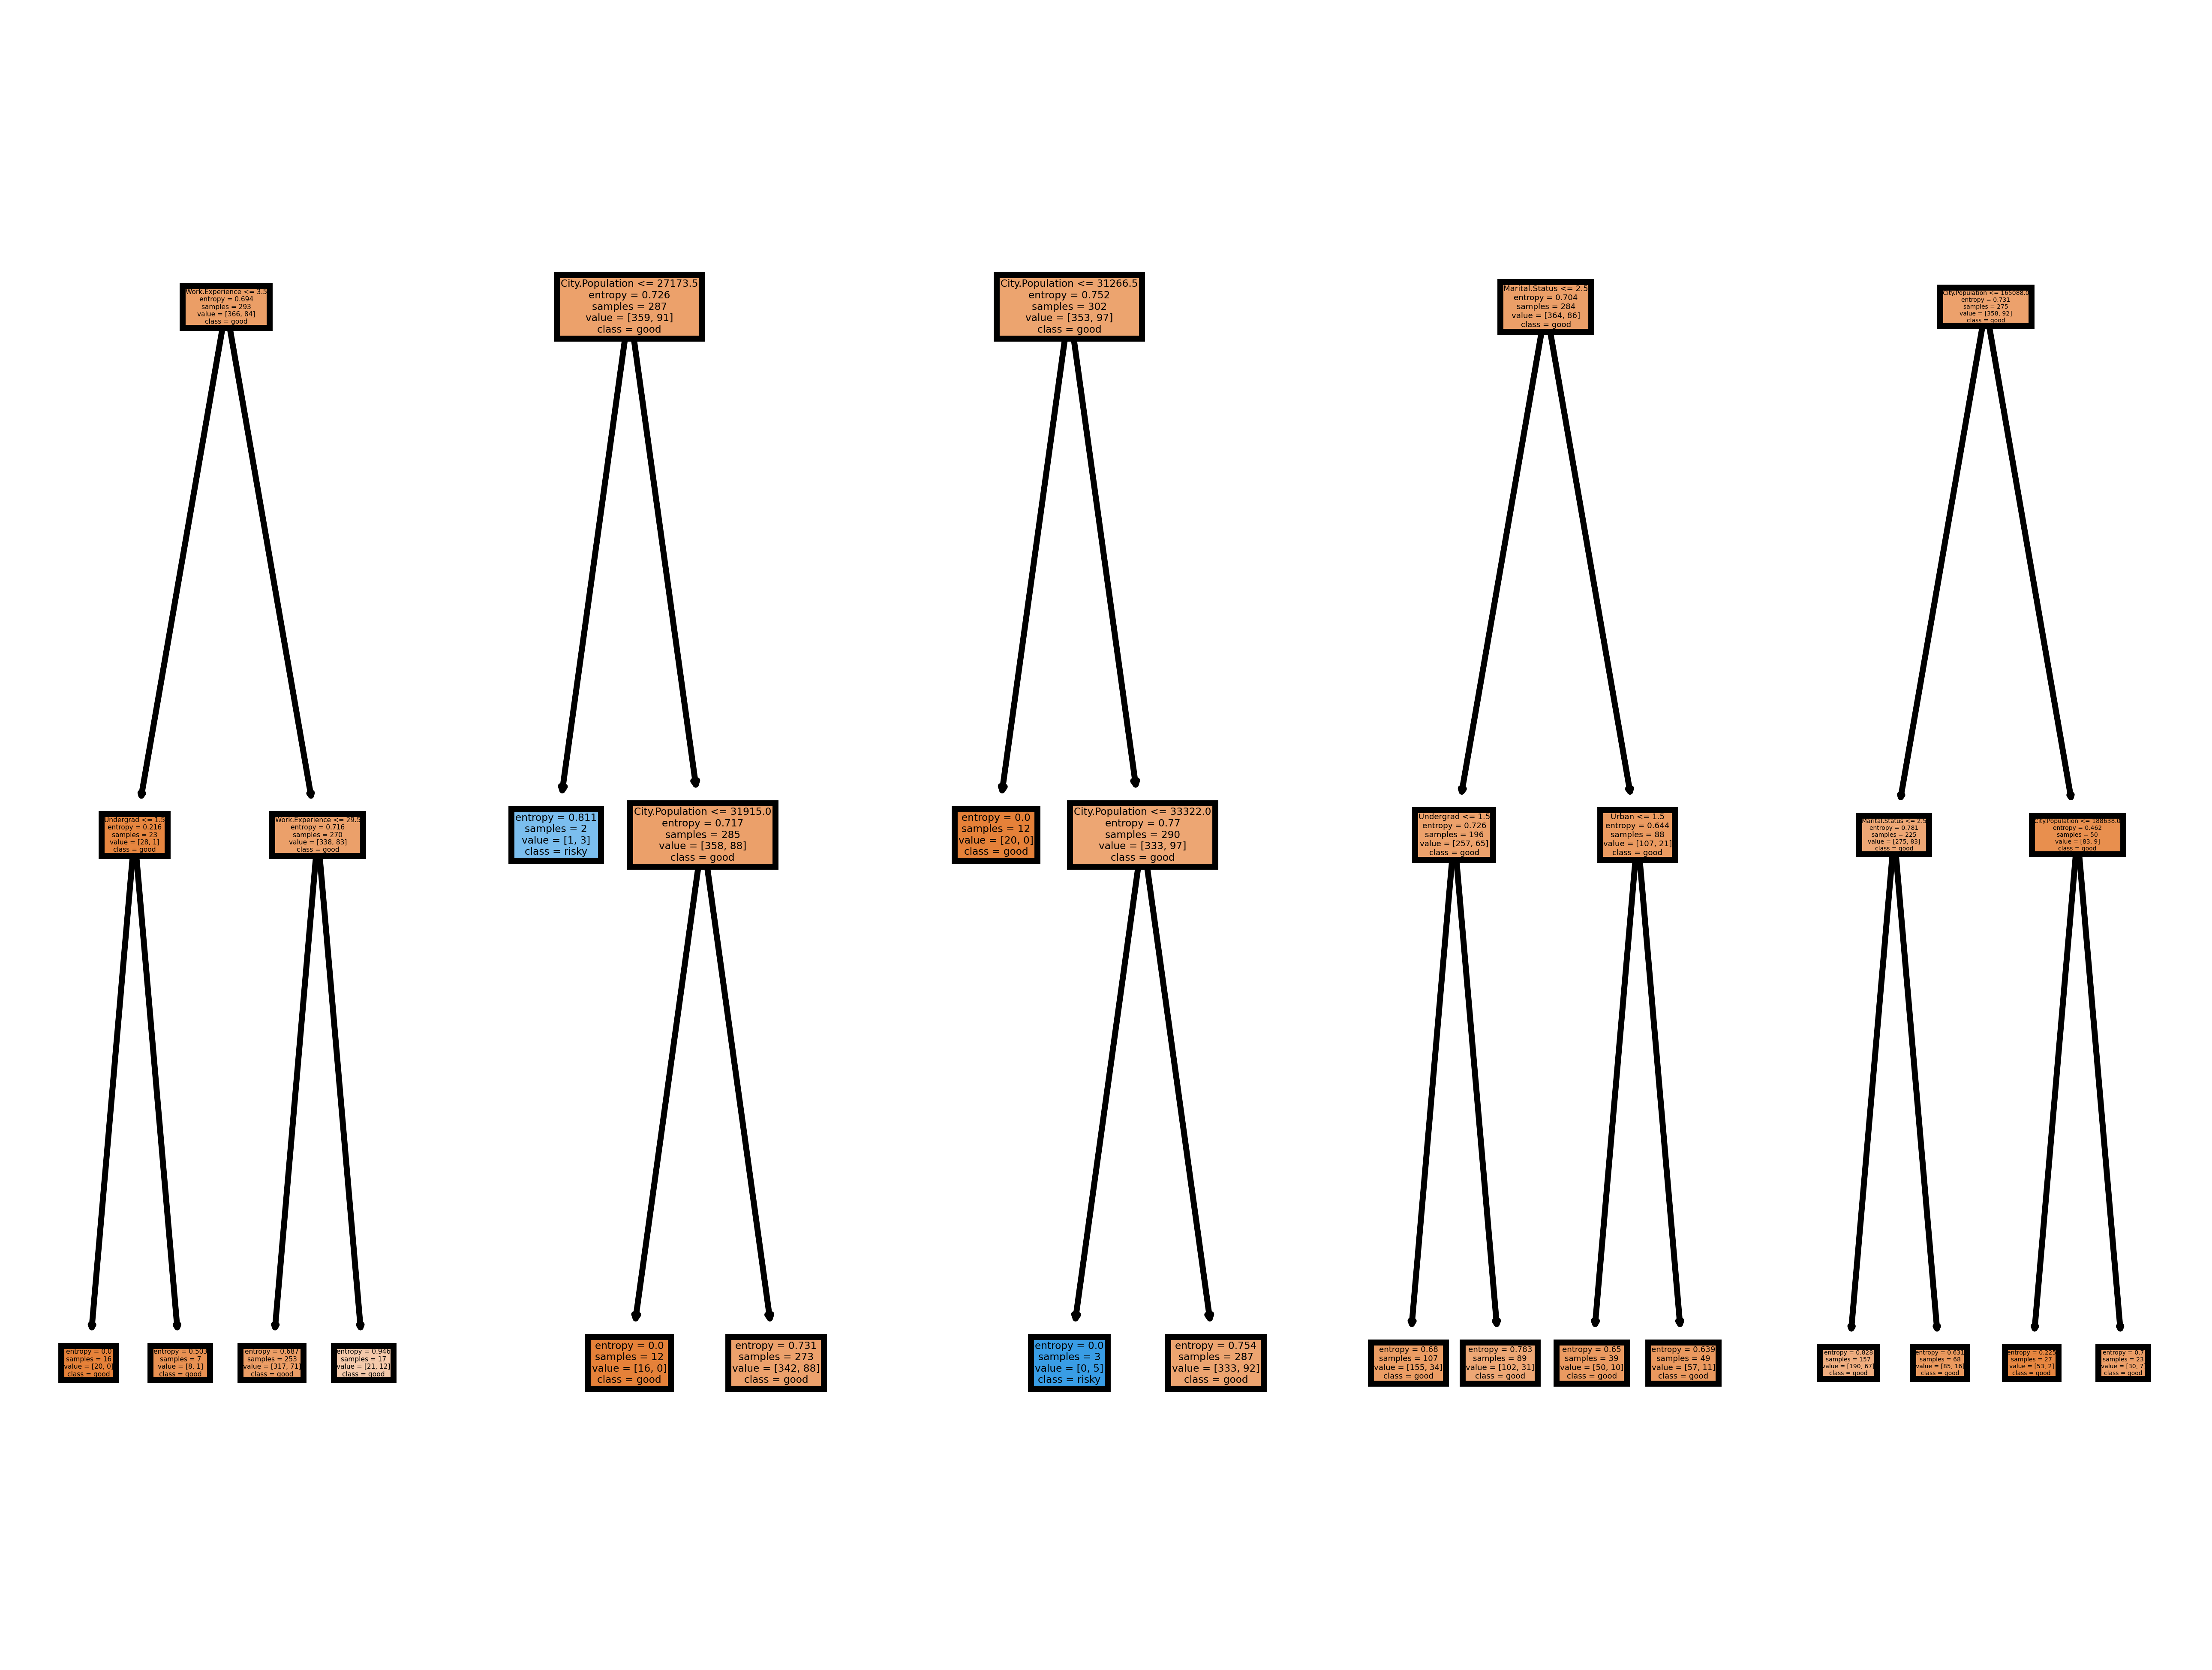

In [40]:
fig,index = plt.subplots(1,5, dpi = 1000)

for i in range(0,5):
    tree.plot_tree(model.estimators_[i],
                  feature_names=x.columns,
                  class_names=df1['Taxable.Income'].unique(),
                   max_depth=2,
                   filled=True,
                  ax = index[i])

# Perform a Bagging Ensemble Technique to increase the accuracy

In [41]:
from sklearn.ensemble import BaggingClassifier

In [42]:
bg=BaggingClassifier(base_estimator=model,n_estimators=10)
bg.fit(xtrain,ytrain)
ypred_1=bg.predict(xtest)
print(classification_report(ytest,ypred_1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.63      0.79      0.70       150



In [43]:
print(bg.score(xtrain,ytrain))
print(bg.score(xtest,ytest))

0.7933333333333333
0.7933333333333333


# Check accuracy with Decision Tree Classifier Model

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
def predict(model1):
    model1.fit(xtrain,ytrain)
    ypred_=model1.predict(xtest)
    print(classification_report(ytest,ypred_))
    print('Training_accuracy:', model1.score(xtrain,ytrain))
    print('Testing_accuracy:', model1.score(xtest,ytest))

In [46]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       119
           1       0.24      0.26      0.25        31

    accuracy                           0.68       150
   macro avg       0.52      0.52      0.52       150
weighted avg       0.69      0.68      0.68       150

Training_accuracy: 1.0
Testing_accuracy: 0.68
